In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = r"C:\\Users\\Hp\\Music\\Projectss\\ml\\MachineLearningRating_v3.csv"

try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found. Please check the file path: {data_path}")

C:\Users\Hp\AppData\Local\Temp\ipykernel_13104\2389244569.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Dataset loaded successfully.


In [5]:
import os
import pandas as pd

# Specify the correct file path
data_path = r"C:\Users\Hp\Music\Projectss\ml\MachineLearningRating_v3.csv"

# Load the dataset
try:
    data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
    print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Create an 'outputs' folder if it doesn't exist
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Summarize the structure of the dataset
if not data.empty:
    summary = {
        "Number of Rows": data.shape[0],
        "Number of Columns": data.shape[1],
        "Column Names": list(data.columns),
        "Column Data Types": data.dtypes.to_dict(),
        "Missing Values": data.isnull().sum().to_dict(),
        "Duplicate Rows": data.duplicated().sum()
    }

    # Save the summary to a file in the outputs folder
    summary_file_path = os.path.join(output_folder, "dataset_summary.txt")
    with open(summary_file_path, "w") as file:
        for key, value in summary.items():
            file.write(f"{key}: {value}\n")

    print(f"Dataset summary saved to {summary_file_path}")
else:
    print("The dataset is empty. Please check the file content.")


C:\Users\Hp\AppData\Local\Temp\ipykernel_13104\2950970291.py:9: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


Dataset loaded successfully.
The dataset contains 1000098 rows and 52 columns.
Dataset summary saved to outputs\dataset_summary.txt


In [ ]:
# Import necessary libraries
import pandas as pd
import os

# Ensure output directory exists
output_dir = "../outputs"
os.makedirs(output_dir, exist_ok=True)

# Load the dataset
data = pd.read_csv(r'C:\Users\Hp\Music\Projectss\ml\MachineLearningRating_v3.csv')

# Display basic information about the dataset
data_info = data.info(buf=None)

# Display the first few rows of the dataset
data_head = data.head()

# 1. Descriptive Statistics for Numerical Features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
descriptive_stats = data[numerical_cols].describe()

# Variability (Standard Deviation and Variance)
variability = pd.DataFrame({
    'Standard Deviation': data[numerical_cols].std(),
    'Variance': data[numerical_cols].var()
})

# 2. Data Structure Review
data_types = data.dtypes

# 3. Data Quality Assessment - Missing Values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_summary_filtered = missing_summary[missing_summary['Missing Values'] > 0]

# Save outputs to files
descriptive_stats.to_csv(os.path.join(output_dir, "descriptive_statistics.csv"))
variability.to_csv(os.path.join(output_dir, "variability.csv"))
missing_summary_filtered.to_csv(os.path.join(output_dir, "missing_values_summary.csv"))

# Save a summary text file
summary_file_path = os.path.join(output_dir, "datasummary.txt")
with open(summary_file_path, "w") as f:
    f.write("Data Summary:\n")
    f.write(f"Number of Rows: {len(data)}\n")
    f.write(f"Number of Columns: {len(data.columns)}\n")
    f.write(f"Column Names: {list(data.columns)}\n\n")
    f.write("Descriptive Statistics:\n")
    f.write(descriptive_stats.to_string())
    f.write("\n\nVariability (Standard Deviation and Variance):\n")
    f.write(variability.to_string())
    f.write("\n\nMissing Values Summary:\n")
    f.write(missing_summary_filtered.to_string())

print(f"Outputs saved in {output_dir}")



In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directory exists for plots
plot_dir = "../outputs/plots"
os.makedirs(plot_dir, exist_ok=True)

# Numerical columns: Plot histograms
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f"{col}_distribution.png"))
    plt.close()

# Categorical columns: Plot bar charts for top 10 categories
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    value_counts = data[col].value_counts().head(10)  # Top 10 categories
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f'Bar Chart of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_dir, f"{col}_barchart.png"))
    plt.close()

print(f"Plots saved in {plot_dir}")


C:\Users\Hp\AppData\Local\Temp\ipykernel_13104\3682922112.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Hp\Music\Projectss\ml\MachineLearningRating_v3.csv')


Correlation Matrix:
              TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


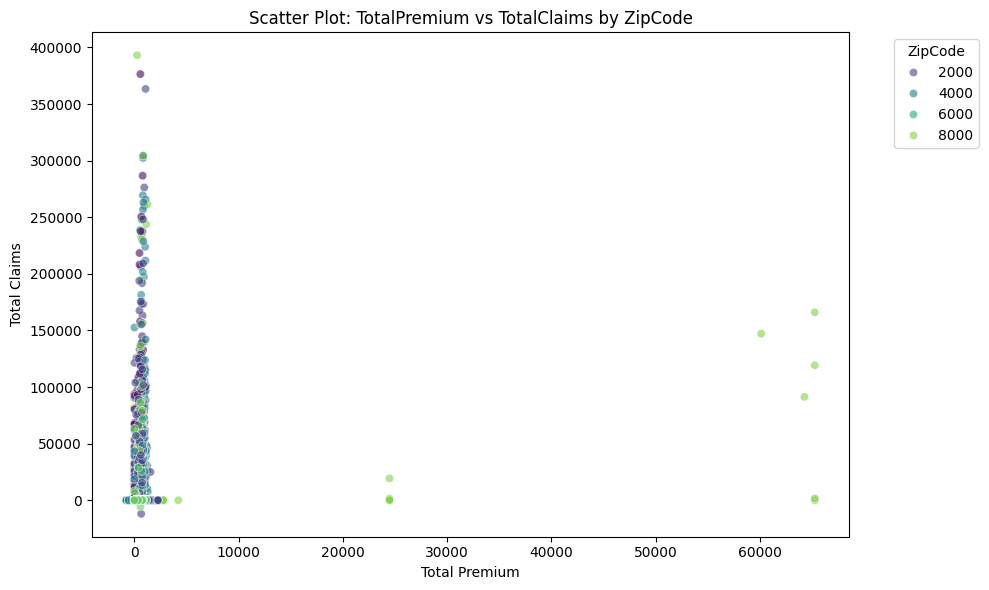

Scatter plot saved to: ../outputs/scatter_totalpremium_vs_totalclaims.png


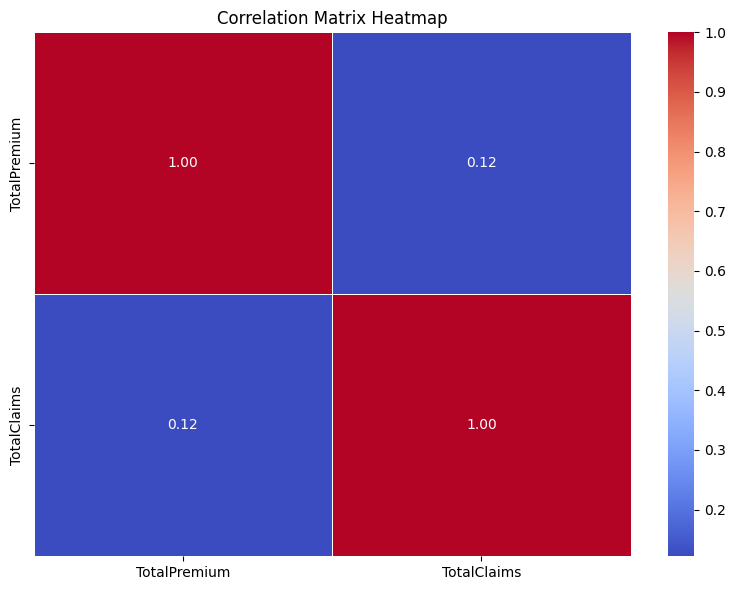

Correlation heatmap saved to: ../outputs/correlation_matrix_heatmap.png


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


data = pd.read_csv(r'C:\Users\Hp\Music\Projectss\ml\MachineLearningRating_v3.csv')


output_dir = "../outputs"
os.makedirs(output_dir, exist_ok=True)

# Calculate correlation matrix for numerical columns
correlation_matrix = data[['TotalPremium', 'TotalClaims']].corr()

# Save the correlation matrix to a file
correlation_matrix.to_csv(f"{output_dir}/correlation_matrix.csv")
print(f"Correlation Matrix:\n{correlation_matrix}")

# Scatter plot for TotalPremium vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', alpha=0.6, hue='PostalCode', palette="viridis")
plt.title('Scatter Plot: TotalPremium vs TotalClaims by ZipCode')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title="ZipCode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save scatter plot
scatter_plot_path = f"{output_dir}/scatter_totalpremium_vs_totalclaims.png"
plt.savefig(scatter_plot_path)
plt.show()

print(f"Scatter plot saved to: {scatter_plot_path}")

# Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()

# Save heatmap
heatmap_path = f"{output_dir}/correlation_matrix_heatmap.png"
plt.savefig(heatmap_path)
plt.show()

print(f"Correlation heatmap saved to: {heatmap_path}")


C:\Users\Hp\AppData\Local\Temp\ipykernel_13104\3443569351.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Hp\Music\Projectss\ml\MachineLearningRating_v3.csv')


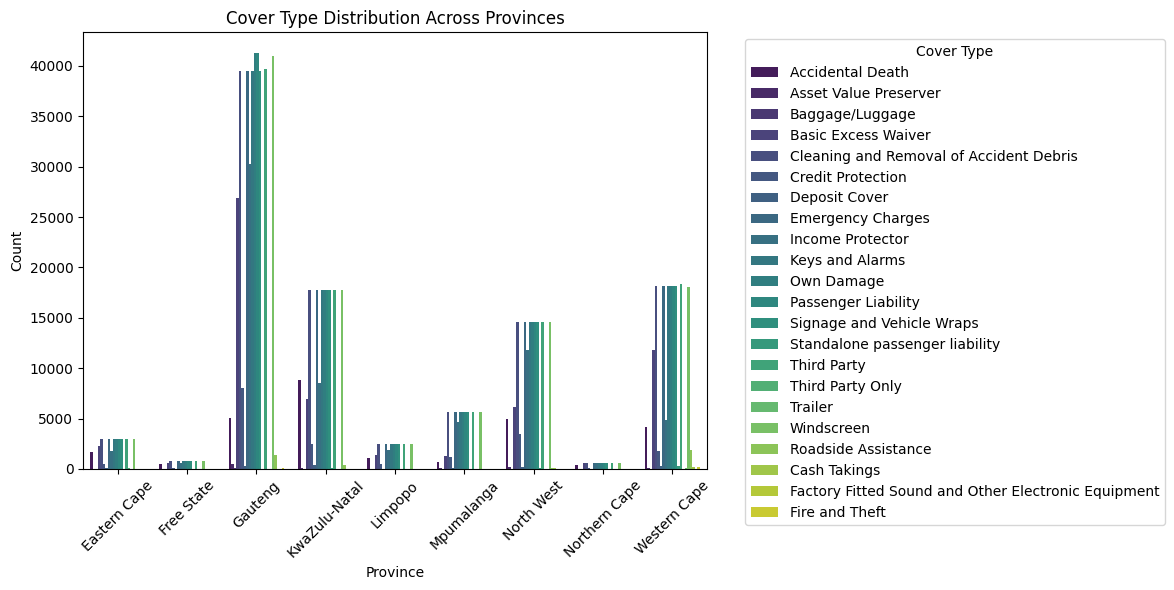

Cover type comparison plot saved to: ../outputs/cover_type_comparison_by_province.png


C:\Users\Hp\AppData\Local\Temp\ipykernel_13104\3443569351.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=province_premiums, x='Province', y='TotalPremium', palette='coolwarm')


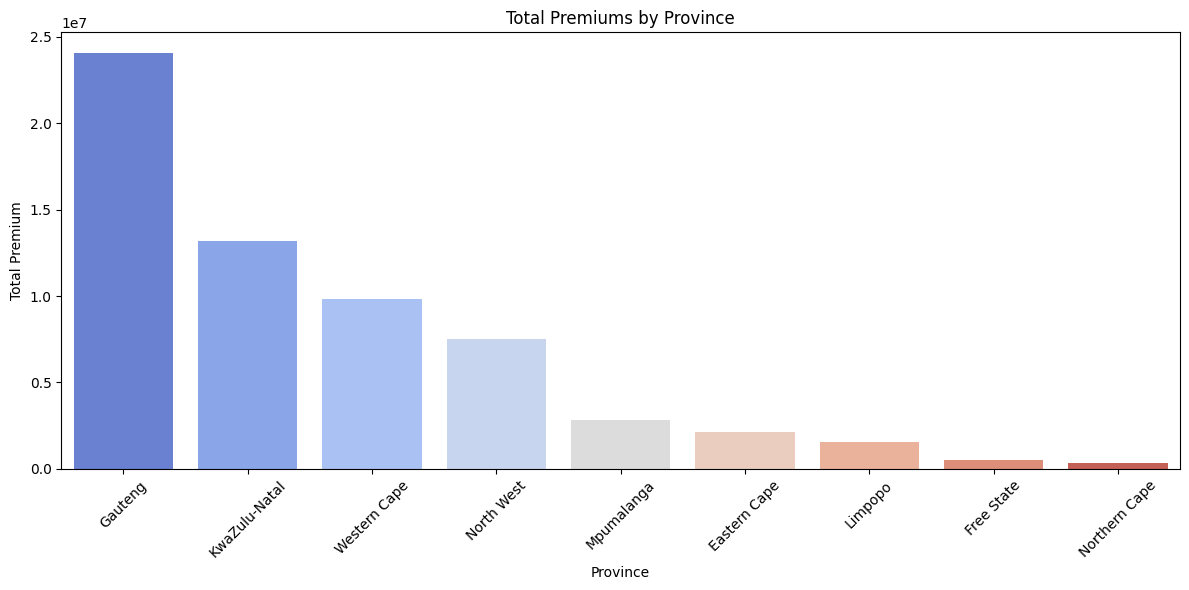

Premium trends plot saved to: ../outputs/total_premiums_by_province.png


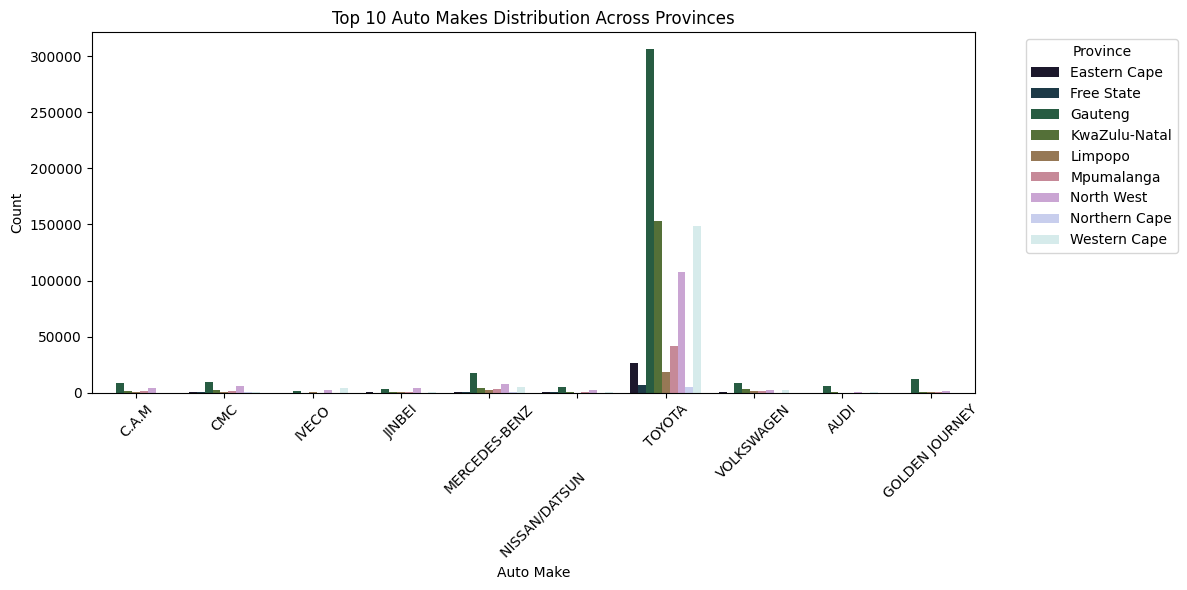

Auto make distribution plot saved to: ../outputs/auto_make_distribution_by_province.png


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load dataset
data = pd.read_csv(r'C:\Users\Hp\Music\Projectss\ml\MachineLearningRating_v3.csv')

# Ensure output directory exists
output_dir = "../outputs"
os.makedirs(output_dir, exist_ok=True)

# 1. Compare Cover Types Across Provinces
plt.figure(figsize=(12, 6))
cover_type_count = data.groupby(['Province', 'CoverType']).size().reset_index(name='Count')
sns.barplot(data=cover_type_count, x='Province', y='Count', hue='CoverType', palette='viridis')
plt.title('Cover Type Distribution Across Provinces')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Province')
plt.legend(title="Cover Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save Cover Type Comparison Plot
cover_type_path = f"{output_dir}/cover_type_comparison_by_province.png"
plt.savefig(cover_type_path)
plt.show()

print(f"Cover type comparison plot saved to: {cover_type_path}")

# 2. Trends in Premium Amounts by Province
plt.figure(figsize=(12, 6))
province_premiums = data.groupby('Province')['TotalPremium'].sum().reset_index().sort_values(by='TotalPremium', ascending=False)
sns.barplot(data=province_premiums, x='Province', y='TotalPremium', palette='coolwarm')
plt.title('Total Premiums by Province')
plt.xticks(rotation=45)
plt.ylabel('Total Premium')
plt.xlabel('Province')
plt.tight_layout()

# Save Premium Trends Plot
premium_trends_path = f"{output_dir}/total_premiums_by_province.png"
plt.savefig(premium_trends_path)
plt.show()

print(f"Premium trends plot saved to: {premium_trends_path}")

# 3. Auto Make Distribution Across Provinces
plt.figure(figsize=(12, 6))
make_distribution = data.groupby(['Province', 'make']).size().reset_index(name='Count')
top_makes = make_distribution.groupby('make')['Count'].sum().nlargest(10).index
filtered_make_dist = make_distribution[make_distribution['make'].isin(top_makes)]
sns.barplot(data=filtered_make_dist, x='make', y='Count', hue='Province', palette='cubehelix')
plt.title('Top 10 Auto Makes Distribution Across Provinces')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Auto Make')
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save Auto Make Distribution Plot
make_distribution_path = f"{output_dir}/auto_make_distribution_by_province.png"
plt.savefig(make_distribution_path)
plt.show()

print(f"Auto make distribution plot saved to: {make_distribution_path}")


C:\Users\Hp\AppData\Local\Temp\ipykernel_13104\3138329394.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Hp\Music\Projectss\ml\MachineLearningRating_v3.csv')


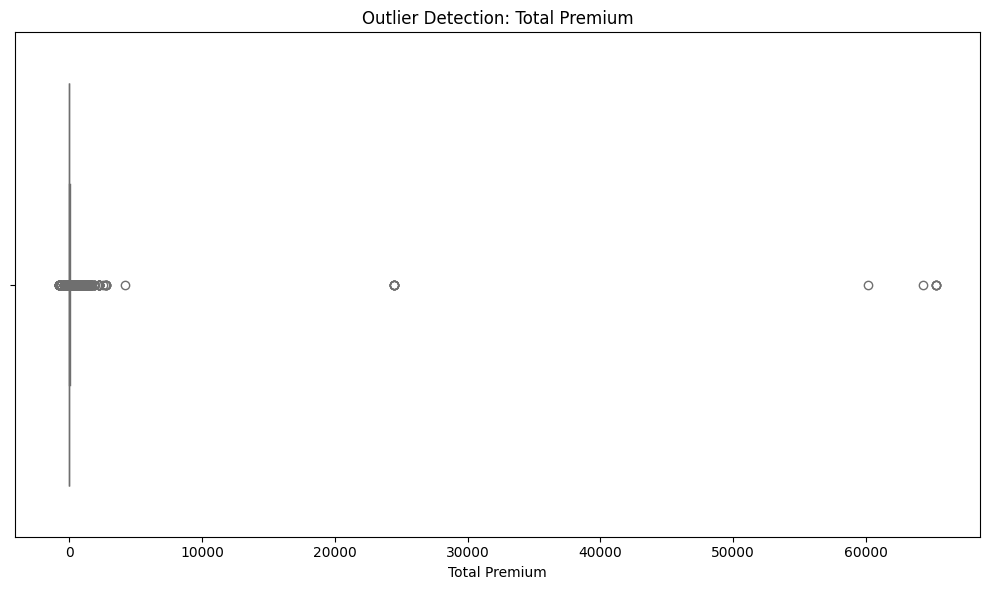

Box plot for TotalPremium saved to: ../outputs/total_premium_outliers.png


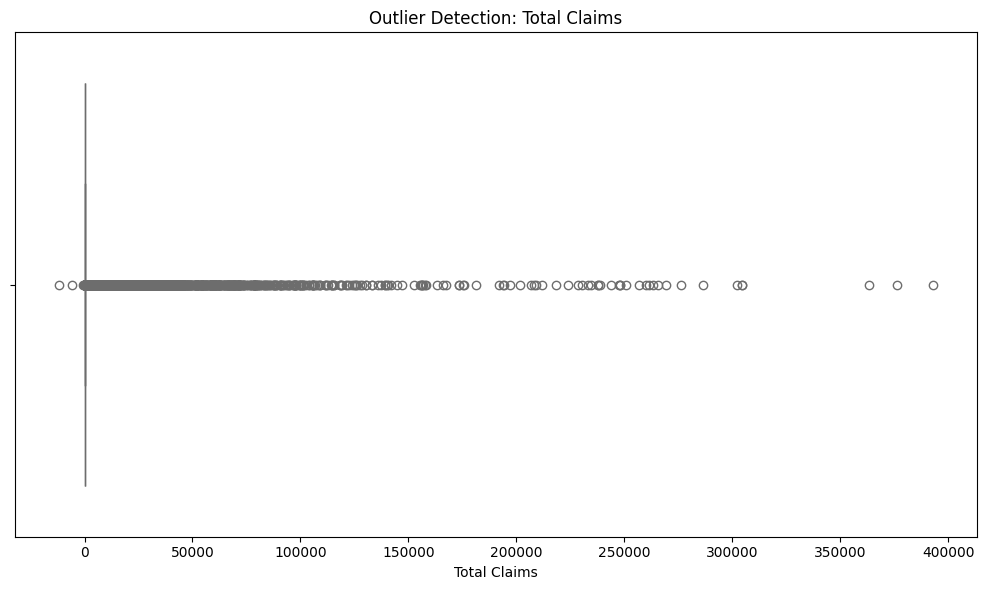

Box plot for TotalClaims saved to: ../outputs/total_claims_outliers.png


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


data = pd.read_csv(r'C:\Users\Hp\Music\Projectss\ml\MachineLearningRating_v3.csv')


output_dir = "../outputs"
os.makedirs(output_dir, exist_ok=True)

# 1. Box Plot for TotalPremium
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['TotalPremium'], color='skyblue')
plt.title('Outlier Detection: Total Premium')
plt.xlabel('Total Premium')
plt.tight_layout()

# Save the box plot
total_premium_outliers_path = f"{output_dir}/total_premium_outliers.png"
plt.savefig(total_premium_outliers_path)
plt.show()

print(f"Box plot for TotalPremium saved to: {total_premium_outliers_path}")

# 2. Box Plot for TotalClaims
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['TotalClaims'], color='salmon')
plt.title('Outlier Detection: Total Claims')
plt.xlabel('Total Claims')
plt.tight_layout()

# Save the box plot
total_claims_outliers_path = f"{output_dir}/total_claims_outliers.png"
plt.savefig(total_claims_outliers_path)
plt.show()

print(f"Box plot for TotalClaims saved to: {total_claims_outliers_path}")


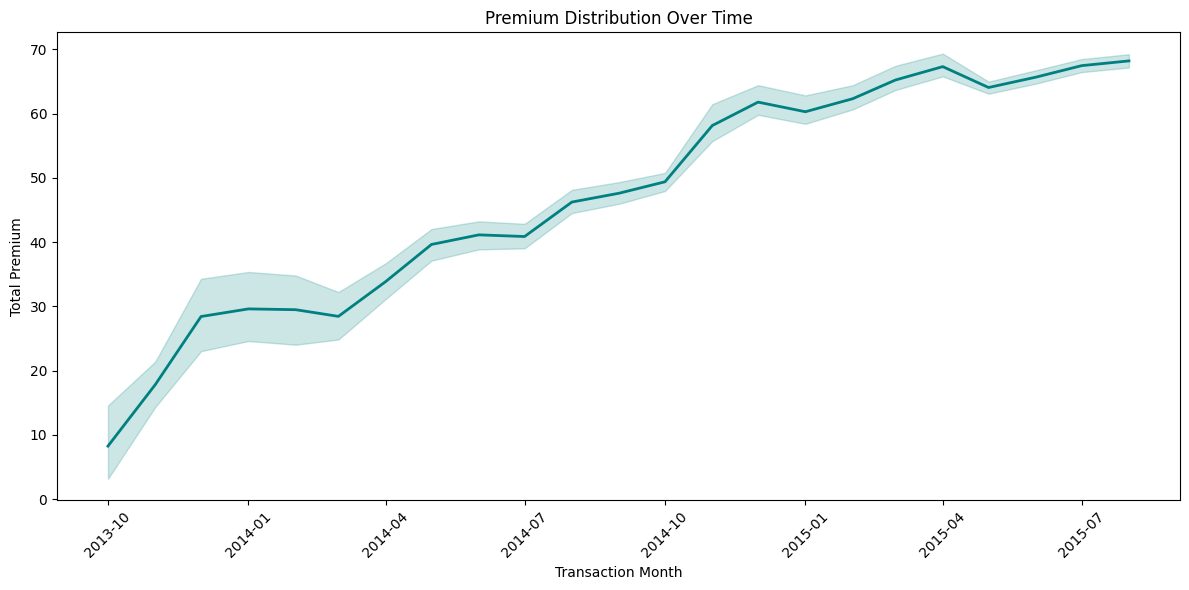

Premium Distribution Over Time saved to: ../outputs/premium_distribution_over_time.png


In [10]:
# Visualization 1: Premium Distribution Over Time
import matplotlib.pyplot as plt
import seaborn as sns


data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'], errors='coerce')

# Plot TotalPremium by TransactionMonth
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['TransactionMonth'], y=data['TotalPremium'], color='teal', linewidth=2)
plt.title('Premium Distribution Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
premium_time_path = f"{output_dir}/premium_distribution_over_time.png"
plt.savefig(premium_time_path)
plt.show()

print(f"Premium Distribution Over Time saved to: {premium_time_path}")


C:\Users\Hp\AppData\Local\Temp\ipykernel_13104\1956827757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='TotalClaims', data=claims_by_province, palette='viridis')


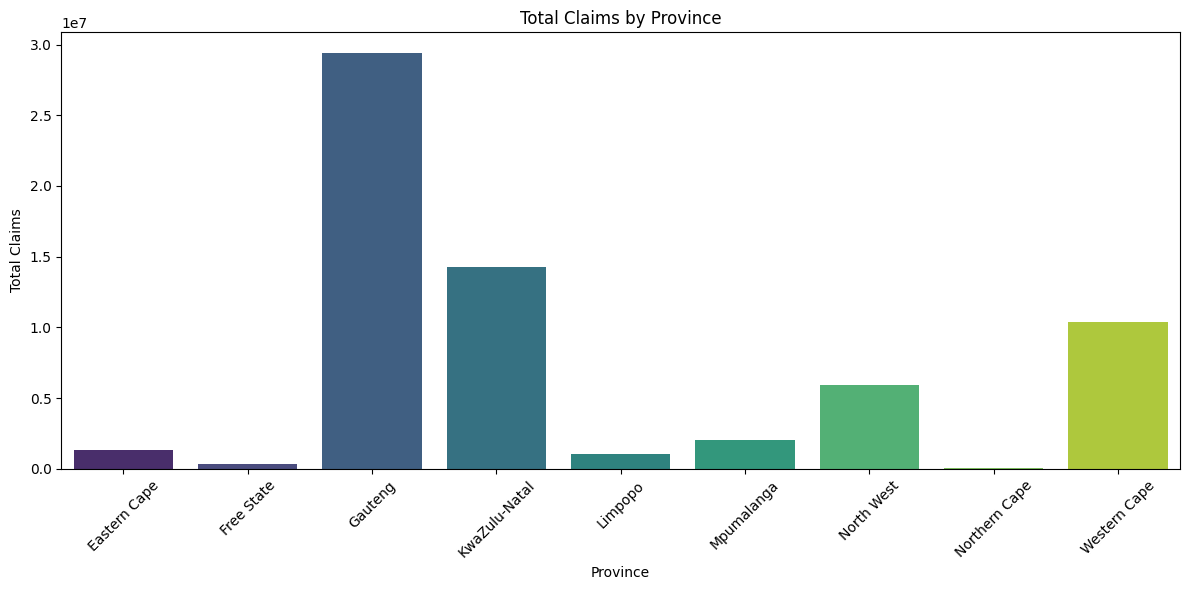

Claims by Province saved to: ../outputs/claims_by_province.png


In [11]:
# Visualization 2: Claims by Province
# Group data by Province and sum TotalClaims
claims_by_province = data.groupby('Province')['TotalClaims'].sum().reset_index()

# Plot bar chart for claims by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='TotalClaims', data=claims_by_province, palette='viridis')
plt.title('Total Claims by Province')
plt.xlabel('Province')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
claims_province_path = f"{output_dir}/claims_by_province.png"
plt.savefig(claims_province_path)
plt.show()

print(f"Claims by Province saved to: {claims_province_path}")
